<a href="https://colab.research.google.com/github/pvanand07/Retail-Sales-Prediction-Regression/blob/master/Retail_Sales_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail Sales Prediction - Regression



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### Submitted By - Anand Siva P V


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/pvanand07/Retail-Sales-Prediction-Regression

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def Load_Dataset():
  df = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/Rossmann Stores Data.csv')
  df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/store.csv')
  return df,df2

In [4]:
def merge_data(df,df2):
  df.set_index('Store', inplace=True)
  df2.set_index('Store', inplace=True)
  df_m = df.join(df2, on='Store')
  return df_m

In [5]:
df,df2 = Load_Dataset()
df_m = merge_data(df,df2)

In [6]:
# Data pre-processing
def cap_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    cleaned_df = df.copy()

    # Iterate over numerical columns
    for column in cleaned_df.select_dtypes(include=np.number):
        # Calculate the 99th percentile value
        cap_value = cleaned_df[column].quantile(0.95)

        # Cap outliers to the 99th percentile value
        cleaned_df[column] = np.where(cleaned_df[column] > cap_value, cap_value, cleaned_df[column])

    return cleaned_df

def pre_processing2(df_m):

  target_col = 'Sales'
  df_c = df_m.drop_duplicates()
  df_c = df_c.dropna()#.sample(n = 5000, random_state = 42)
  #df_c = df_c.sample(n = 5000, random_state = 42)

  # Generate  week_number, month and year columns from datetime
  df_c['week_number'] = (df_c['Date']).dt.week
  df_c['month'] = (df_c['Date']).dt.month
  df_c['year'] = (df_c['Date']).dt.year
  df_c.drop(['Date','Customers'], axis=1, inplace=True)#,'Customers'

  df_c = cap_outliers(df_c)


  # Separate features and target
  X = df_c.drop(target_col, axis=1)
  y = df_c[target_col]

  # Perform one-hot encoding for categorical features
  categorical_features = X.select_dtypes(include='category').columns.tolist()
  X_encoded = pd.get_dummies(X, columns=categorical_features)

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [7]:
# Data pre-processing
def pre_processing(df_m):

  target_col = 'Sales'
  df_c = df_m.drop_duplicates()
  df_c = df_c.dropna()#.sample(n = 5000, random_state = 42)
  #df_c = df_c.sample(n = 5000, random_state = 42)

  if df['Date'].dtype == 'object':
    df_c['Date'] = pd.to_datetime(df_c['Date'])
  # Generate  week_number, month and year columns from datetime
  df_c['week_number'] = pd.to_datetime(df_c['Date']).dt.week
  df_c['month'] = pd.to_datetime(df_c['Date']).dt.month
  df_c['year'] = pd.to_datetime(df_c['Date']).dt.year
  df_c.drop(['Date','StateHoliday','Customers'], axis=1, inplace=True)#,'Customers'


  # Separate features and target
  X = df_c.drop(target_col, axis=1)
  y = df_c[target_col]

  # Perform one-hot encoding for categorical features
  categorical_features = X.select_dtypes(include='object').columns.tolist()
  X_encoded = pd.get_dummies(X, columns=categorical_features)

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)
  return X_train, X_test, y_train, y_test

In [8]:
# Load Dataset
df,df2 = Load_Dataset()
print(df.shape)
df.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/store.csv')
print(df2.shape)
df2.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
def merge_data(df,df2):
  df.set_index('Store', inplace=True)
  df2.set_index('Store', inplace=True)
  df = df.join(df2, on='Store')
  return df_m

In [32]:
X_train, X_test, y_train, y_test = pre_processing2(df_m2)
X_train['Sales'] = y_train
X_train.to_csv('Retail_sales_cleaned_dataset.csv')

In [ ]:
df_m2.to_csv('Retail_sales_cleaned_dfm2_full.csv')

### Dataset First View

In [15]:
# Dataset First Look
df_m.sample(5)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
1003,2,2014-10-28,6101,741,1,0,0,0,a,a,170.0,7.0,2013.0,1,27.0,2013.0,"Jan,Apr,Jul,Oct"
966,2,2013-07-09,5410,587,1,0,0,0,a,a,760.0,2.0,2008.0,0,NaN,NaN,NaN
1034,4,2013-11-07,7421,871,1,1,0,0,a,a,13750.0,4.0,2015.0,0,NaN,NaN,NaN
924,3,2014-01-22,5266,468,1,1,0,0,a,a,6420.0,4.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
203,1,2015-03-02,8719,1026,1,1,0,0,c,c,490.0,11.0,2002.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
print(f'The dataset has {df_m.shape[0]} rows and {df_m.shape[1]} columns')

The dataset has 1017209 rows and 17 columns


### Dataset Information

In [17]:
# Dataset Info
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2         

### Building base model

In [ ]:
X_train, X_test, y_train, y_test = pre_processing(df_m)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Build the decision tree classifier

classifier = DecisionTreeRegressor(criterion='entropy', max_leaf_nodes=15, random_state=0)
classifier.fit(X_train, y_train)


In [ ]:
y_predicted = classifier.predict(X_test)

In [ ]:
y_predicted[:10]

In [ ]:
y_test[:10]

In [ ]:
accuracy_score(y_test, y_predicted) * 100

In [ ]:
feature_importance = pd.DataFrame(zip(classifier.feature_names_in_, classifier.feature_importances_)).sort_values(by=1, ascending=False)
feature_importance[feature_importance[1] > 0]


In [ ]:
X_train, X_test, y_train, y_test = pre_processing(df_m)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Build a Random Forest Classifier
classifier = RandomForestRegressor(n_estimators=40, random_state=42, max_depth=10, max_leaf_nodes=10)

# TODO: Fix OUT OF MEMMORY
#classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
feature_importance = pd.DataFrame(zip(classifier.feature_names_in_, classifier.feature_importances_)).sort_values(by=1, ascending=False)
feature_importance[feature_importance[1] > 0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

X_train, X_test, y_train, y_test = pre_processing2(df_m2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.sqrt(y_train)
y_test = np.sqrt(y_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
R2_score = regressor.score(X_test, y_test)
print(R2_score)

In [ ]:
plt.scatter(y_pred,y_test)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred),(y_test)-(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

In [ ]:
regressor = SGDRegressor()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
R2_score = regressor.score(X_test, y_test)
print(R2_score)

In [ ]:
list(zip(y_pred, y_test))

In [ ]:
df_m.sample(5)

In [ ]:
df_m2.sample(5)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = pre_processing(df_m)
X_train2, X_test2, y_train2, y_test2 = pre_processing2(df_m2)
y_train2 = np.log1p(y_train2)
y_test2 = np.log1p(y_test2)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

y_pred = regressor.predict(X_test2)
R2_score = regressor.score(X_test2, y_test2)
print(R2_score)

In [ ]:
regressor.coef_

In [ ]:
plt.scatter(y_pred,y_test2)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred),(y_test2)-(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

In [ ]:
pd.DataFrame(regressor.coef_,X_train2.columns).sort_values(by=0, ascending=False).plot(kind='barh')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y_train = y_test2
# Predict on the training data
y_train_pred = y_pred

# Calculate R2 score
r2 = r2_score(y_train, y_train_pred)
print("R2 Score:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Adjusted R2
n = X_train.shape[0]  # Number of samples
p = X_train.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2 Score:", adjusted_r2)

# Calculate Mean Percentage Error (MPE)
mpe = np.mean((y_train - y_train_pred) / y_train) * 100
print("Mean Percentage Error (MPE):", mpe)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


In [ ]:
regressor.coef_,pd.DataFrame(X_train).columns

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

y_pred = regressor.predict(X_test2)
R2_score = regressor.score(X_test2, y_test2)
print(R2_score)

### Data Cleaning

#### Duplicate Values

In [22]:
# Dataset Duplicate Value Count
print('The dataset has:',df_m.duplicated().sum(),'duplicate rows')

The dataset has: 595 duplicate rows


#### Missing Values/Null Values

In [23]:
# Missing Values/Null Values Count
missing_values = df_m.isna().sum().sort_values(ascending=False)
print('Features with missing values','Count\n')
missing_values[missing_values > 0]

Features with missing values Count



PromoInterval                508031
Promo2SinceYear              508031
Promo2SinceWeek              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
dtype: int64

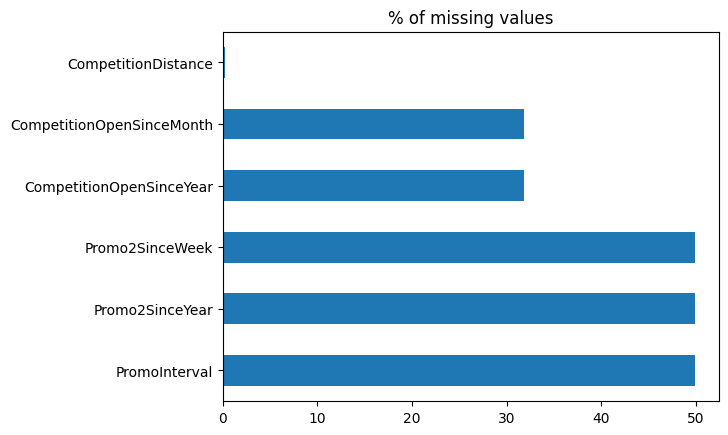

In [24]:
# Visualizing the % of missing values
(missing_values[missing_values > 0]*100/df_m.shape[0]).plot(kind='barh')
plt.title('% of missing values')
plt.show()

### What did you know about your dataset?

The dataset represents historical sales data for 1,115 Rossmann stores. The dataset contains 1,017,209 entries (rows) and 17 features (columns). The dataset contains 595 duplicate entries and 5 features with more than 30% missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_m.columns.tolist()

In [ ]:
# Dataset Describe
df_m.describe()

### Variables Description 

The dataset includes the following features:

- **Id**: Represents a unique identifier for a combination of Store and Date within the test set.
- **Store**: A unique identifier for each store.
- **Sales**: The turnover (sales) for a given day, which is the target variable to be predicted.
- **Customers**: The number of customers on a given day.
- **Open**: An indicator of whether the store was open: 0 = closed, 1 = open.
- **StateHoliday**: Indicates a state holiday. Most stores are closed on state holidays, except for a few exceptions. The values are: a = public holiday, b = Easter holiday, c = Christmas, 0 = None.
- **SchoolHoliday**: Indicates whether the (Store, Date) was affected by the closure of public schools.
- **StoreType**: Differentiates between four different store models: a, b, c, d.
- **Assortment**: Describes the assortment level of the store: a = basic, b = extra, c = extended.
- **CompetitionDistance**: The distance in meters to the nearest competitor store.
- **CompetitionOpenSince[Month/Year]**: Provides an approximate year and month when the nearest competitor store was opened.
- **Promo**: Indicates whether a store is running a promotion on a given day.
- **Promo2**: Represents a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.
- **Promo2Since[Year/Week]**: Describes the year and calendar week when the store started participating in Promo2.
- **PromoInterval**: Describes the consecutive intervals when Promo2 is started, specifying the months in which the promotion is started anew. For example, "Feb,May,Aug,Nov" means the promotion starts in February, May, August, and November of any given year for that store.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df_m.nunique().sort_values(ascending=False)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
# Checking value counts during 'open' and 'closed'
print(df_m['Open'].value_counts())

1    844392
0    172817
Name: Open, dtype: int64


In [26]:
# Checking sum of sales during 'open' and 'closed'
print(df_m[['Open','Sales']].groupby(['Open']).sum())

           Sales
Open            
0              0
1     5873180623


- Since there are no sales when the stores are 'closed' we can drop the values where store is 'closed'.
- We can drop the 'Open' column since it contains only 1 unique value.

In [27]:
# Selecting only the rows with Open = 1
df_m2 = df_m[df_m['Open'] == 1].drop('Open', axis=1).copy()

# Converting Date to Datetime for analysis and feature engineering
df_m2['Date'] = pd.to_datetime(df_m2['Date'])

# We can also convert object Dtype to category for reduced memory usage
for col in df_m2.select_dtypes('object').columns:
  df_m2[col] = df_m2[col].astype('category')

In [28]:
df_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 1 to 1097
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DayOfWeek                  844392 non-null  int64         
 1   Date                       844392 non-null  datetime64[ns]
 2   Sales                      844392 non-null  int64         
 3   Customers                  844392 non-null  int64         
 4   Promo                      844392 non-null  int64         
 5   StateHoliday               844392 non-null  category      
 6   SchoolHoliday              844392 non-null  int64         
 7   StoreType                  844392 non-null  category      
 8   Assortment                 844392 non-null  category      
 9   CompetitionDistance        842206 non-null  float64       
 10  CompetitionOpenSinceMonth  575773 non-null  float64       
 11  CompetitionOpenSinceYear   575773 non-null  float64   

In [29]:
#checking number of unique values in each categorical column
[df_m2[col].value_counts() for col in df_m2.select_dtypes('category').columns]

[0    731342
 0    112140
 a       694
 b       145
 c        71
 Name: StateHoliday, dtype: int64,
 a    457077
 d    258774
 c    112978
 b     15563
 Name: StoreType, dtype: int64,
 a    444909
 c    391271
 b      8212
 Name: Assortment, dtype: int64,
 Jan,Apr,Jul,Oct     242411
 Feb,May,Aug,Nov      98005
 Mar,Jun,Sept,Dec     80669
 Name: PromoInterval, dtype: int64]

In [30]:
# Checking unique values in 'StateHoliday'
print(df_m2['StateHoliday'].unique())

['0', 'a', 'b', 'c', 0]
Categories (5, object): [0, '0', 'a', 'b', 'c']


The 'StateHoliday' column contains a mix of integer and string representations of the "0" value. This can cause the value counts to show duplicates.

In [31]:
# Replace all variations of "0" with a single representation
df_m2['StateHoliday'] = df_m2['StateHoliday'].replace(['0', 0], '0')

### What all manipulations have you done and insights you found?

- The dataset contains a mix of categorical and numerical columns.
-  The sum of sales for closed stores are zero Hence selecting only the rows with Open = 1.
- Dropped the 'Open' column since it contains only one unique value (1 for open stores).
- Converted the 'Date' column to datetime data type for analysis and feature engineering purposes.
- The 'StateHoliday' column has a mix of integer and string representations of the "0" value, which has been resolved by replacing all variations of "0" with str(0).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Test Visuals

In [ ]:
df_m2.sample(5)

,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,
204,3,2015-05-13,6044,604,0,0,0,a,a,5630.0,12.0,2002.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
921,4,2013-06-13,9541,1202,0,0,0,a,a,840.0,9.0,2006.0,0,NaN,NaN,NaN
276,1,2014-08-25,3987,559,0,0,1,a,a,2960.0,10.0,2014.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec"
1068,5,2013-06-14,3724,262,0,0,0,d,c,5010.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
674,6,2013-10-05,5424,721,0,0,0,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"


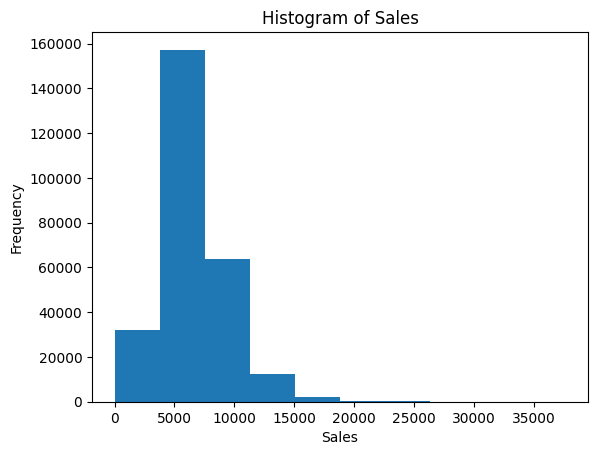

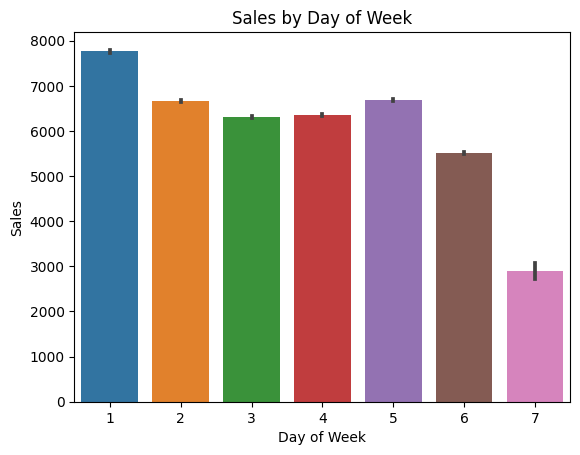

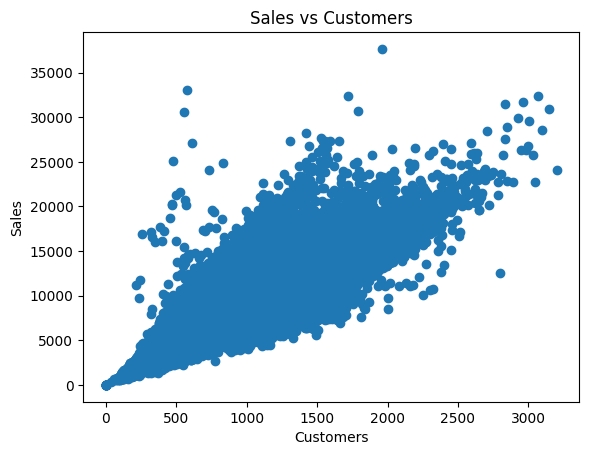

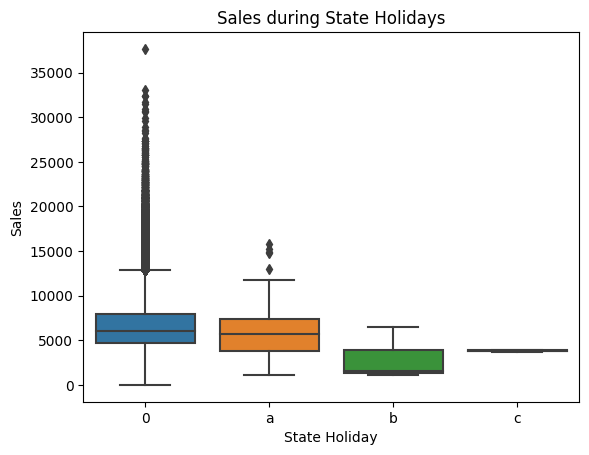

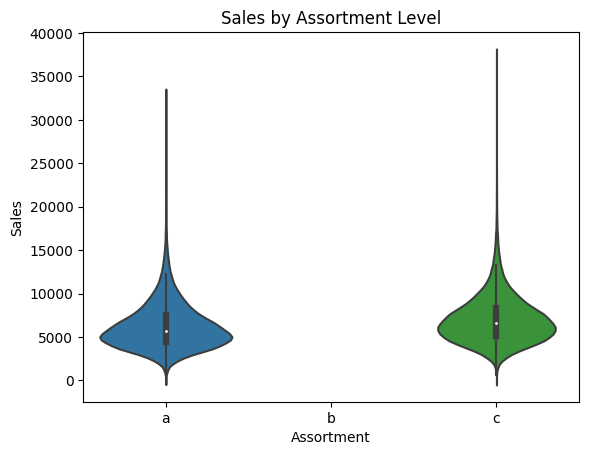

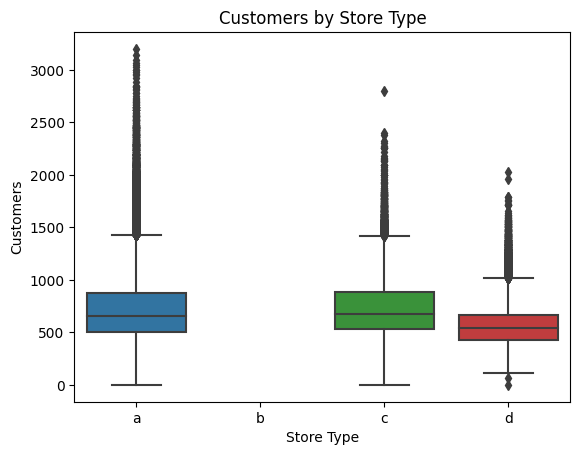

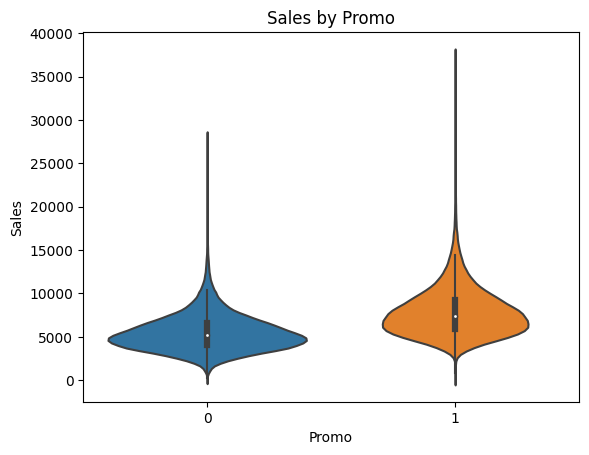

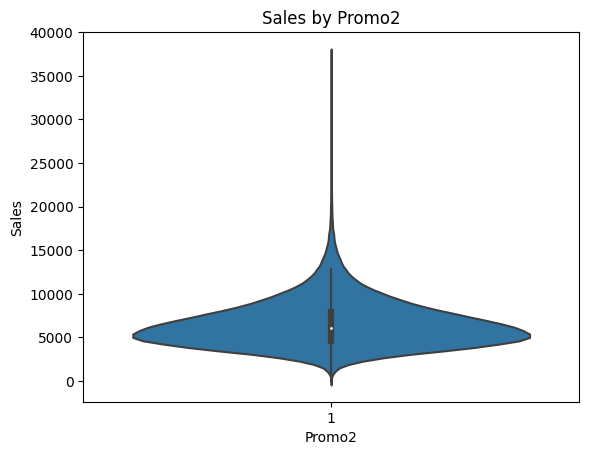

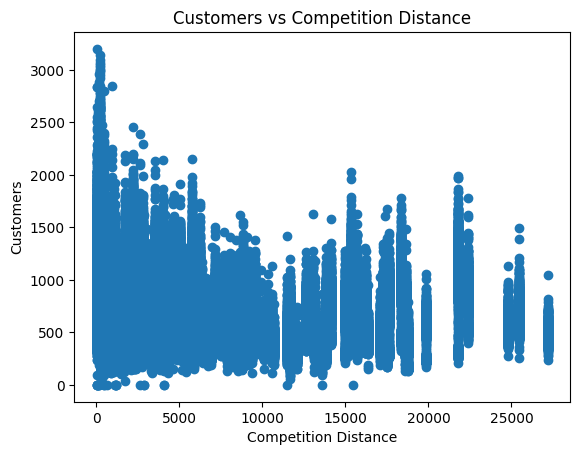

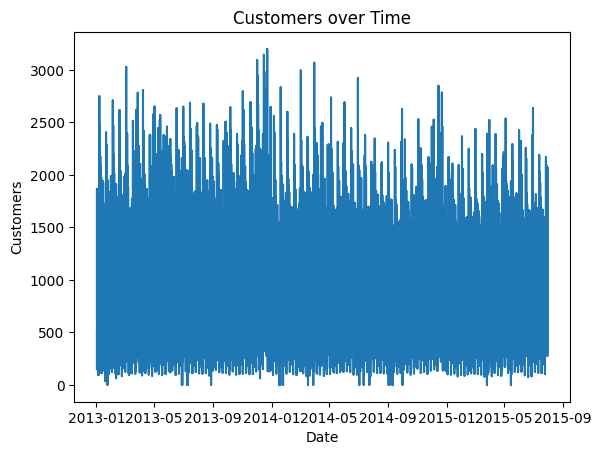

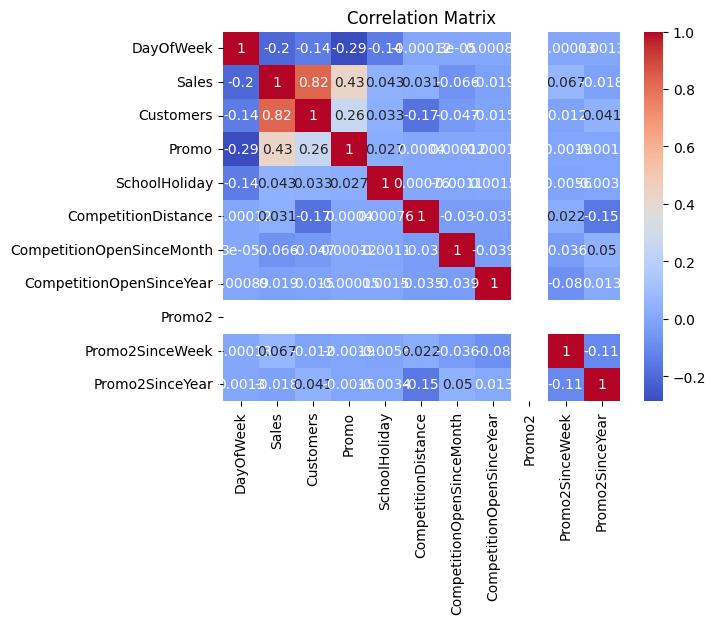

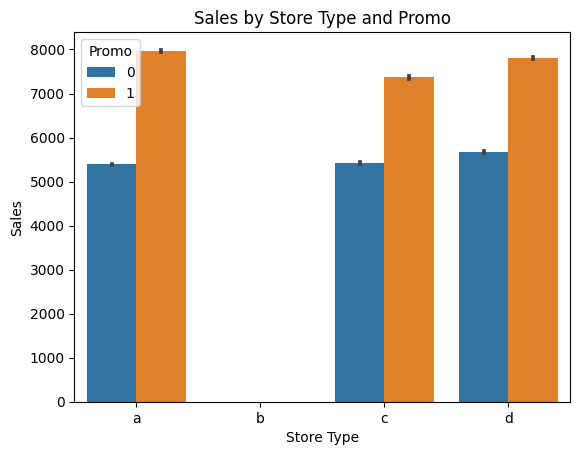

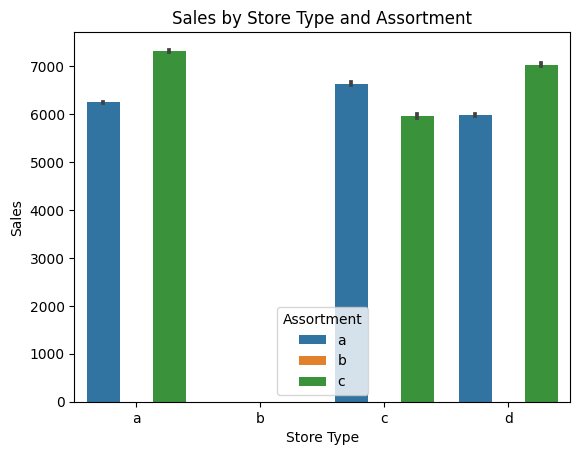

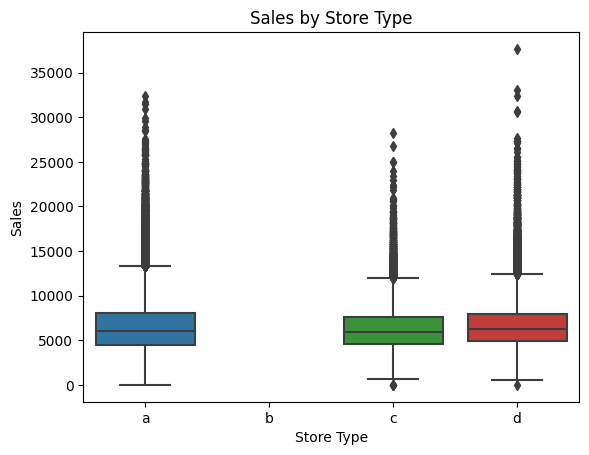

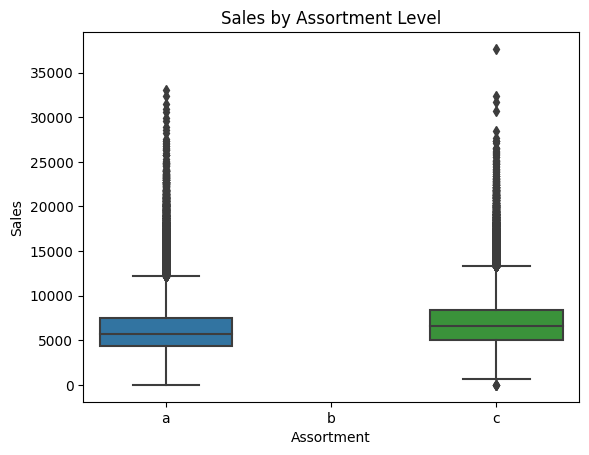

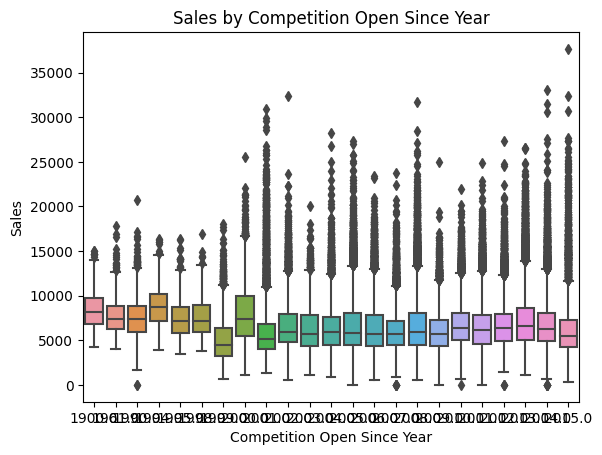

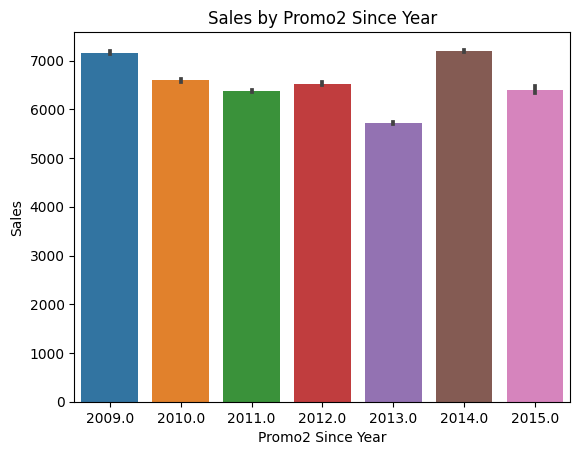

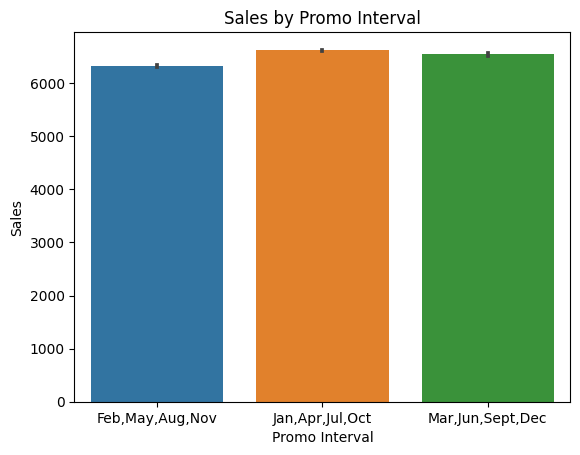

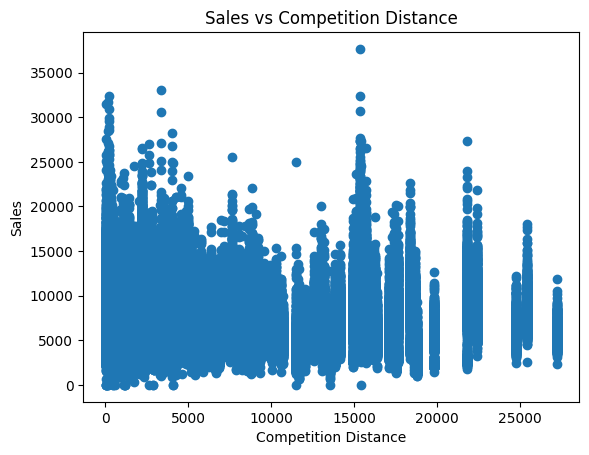

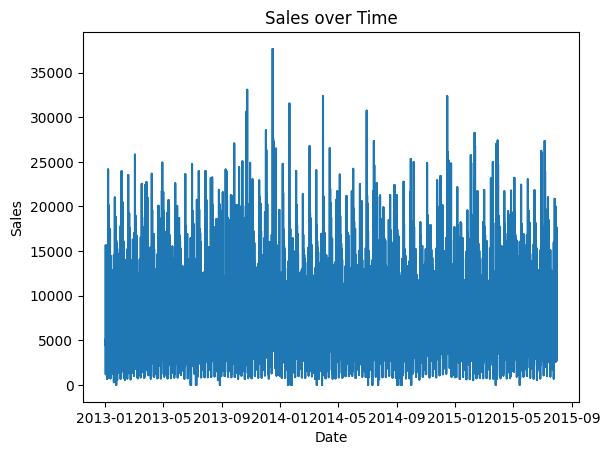

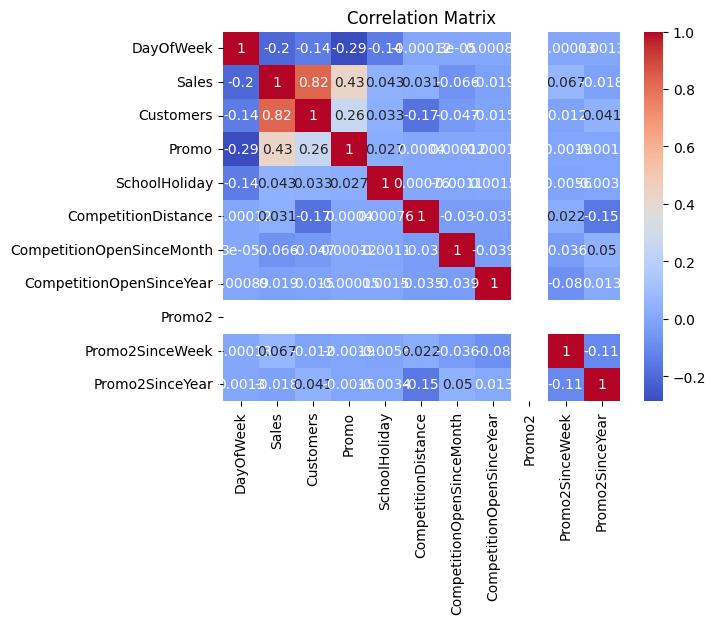

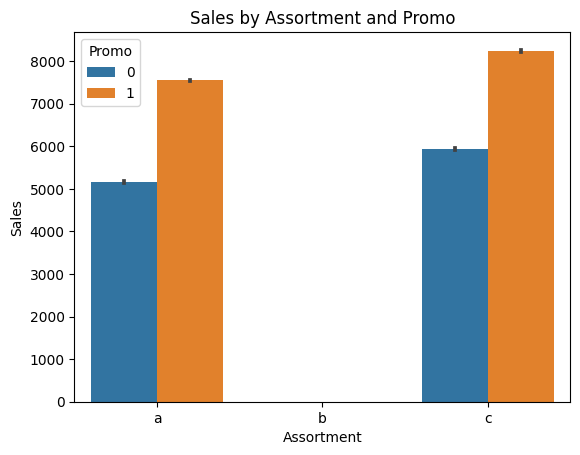

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values
df_m2.dropna(inplace=True)

# Handle duplicates
df_m2.drop_duplicates(inplace=True)

# 1. Histogram
plt.hist(df_m2['Sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()

# 2. Bar Plot
sns.barplot(x='DayOfWeek', y='Sales', data=df_m2)
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.title('Sales by Day of Week')
plt.show()

# 3. Scatter Plot
plt.scatter(df_m2['Customers'], df_m2['Sales'])
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Sales vs Customers')
plt.show()

# 4. Box Plot
sns.boxplot(x='StateHoliday', y='Sales', data=df_m2)
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.title('Sales during State Holidays')
plt.show()

# 5. Violin Plot
sns.violinplot(x='Assortment', y='Sales', data=df_m2)
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales by Assortment Level')
plt.show()

# 6. Box Plot
sns.boxplot(x='StoreType', y='Customers', data=df_m2)
plt.xlabel('Store Type')
plt.ylabel('Customers')
plt.title('Customers by Store Type')
plt.show()

# 7. Violin Plot
sns.violinplot(x='Promo', y='Sales', data=df_m2)
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.title('Sales by Promo')
plt.show()

# 8. Violin Plot
sns.violinplot(x='Promo2', y='Sales', data=df_m2)
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.title('Sales by Promo2')
plt.show()

# 9. Scatter Plot
plt.scatter(df_m2['CompetitionDistance'], df_m2['Customers'])
plt.xlabel('Competition Distance')
plt.ylabel('Customers')
plt.title('Customers vs Competition Distance')
plt.show()

# 10. Line Plot
df_m2['Date'] = pd.to_datetime(df_m2['Date'])
plt.plot(df_m2['Date'], df_m2['Customers'])
plt.xlabel('Date')
plt.ylabel('Customers')
plt.title('Customers over Time')
plt.show()

# 11. Heatmap
corr_matrix = df_m2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 12. Stacked Bar Plot
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=df_m2)
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.title('Sales by Store Type and Promo')
plt.show()

# 13. Stacked Bar Plot
sns.barplot(x='StoreType', y='Sales', hue='Assortment', data=df_m2)
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.title('Sales by Store Type and Assortment')
plt.show()

# 14. Box Plot
sns.boxplot(x='StoreType', y='Sales', data=df_m2)
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.title('Sales by Store Type')
plt.show()

# 15. Box Plot
sns.boxplot(x='Assortment', y='Sales', data=df_m2)
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales by Assortment Level')
plt.show()

# 16. Box Plot
sns.boxplot(x='CompetitionOpenSinceYear', y='Sales', data=df_m2)
plt.xlabel('Competition Open Since Year')
plt.ylabel('Sales')
plt.title('Sales by Competition Open Since Year')
plt.show()

# 17. Bar Plot
sns.barplot(x='Promo2SinceYear', y='Sales', data=df_m2)
plt.xlabel('Promo2 Since Year')
plt.ylabel('Sales')
plt.title('Sales by Promo2 Since Year')
plt.show()

# 18. Bar Plot
sns.barplot(x='PromoInterval', y='Sales', data=df_m2)
plt.xlabel('Promo Interval')
plt.ylabel('Sales')
plt.title('Sales by Promo Interval')
plt.show()

# 19. Scatter Plot
plt.scatter(df_m2['CompetitionDistance'], df_m2['Sales'])
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.title('Sales vs Competition Distance')
plt.show()

# 20. Line Plot
plt.plot(df_m2['Date'], df_m2['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales over Time')
plt.show()

# 21. Heatmap
corr_matrix = df_m2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 22. Stacked Bar Plot
sns.barplot(x='Assortment', y='Sales', hue='Promo', data=df_m2)
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales by Assortment and Promo')
plt.show()






#### Chart - 1

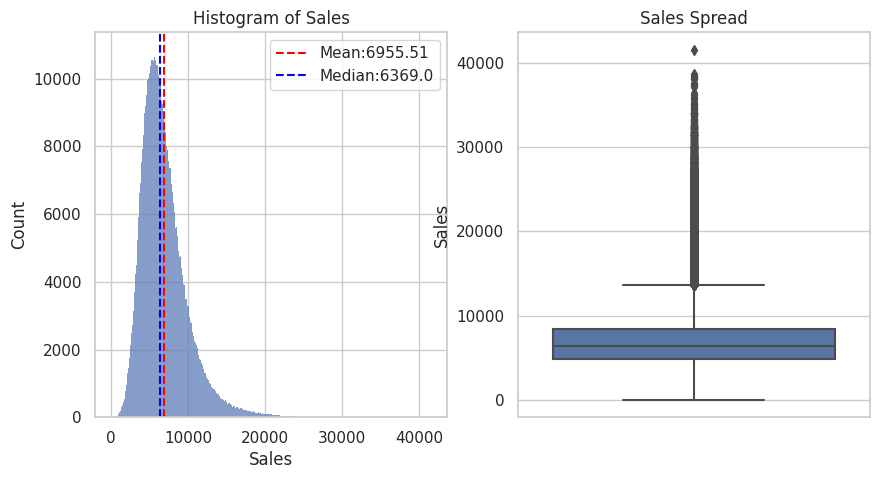

5th Percentile of Sales 3173.0
95th Percentile of Sales 12668.0


In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))

#plt.subplot(1,2,1)
#plt.title('Histogram of Sales')
#sns.distplot(df_m2['Sales'])

plt.subplot(1,2,1)
plt.title('Histogram of Sales')
sns.histplot(df_m2['Sales'])

# Calculate the mean and median
mean_value = df_m2['Sales'].mean().round(2)
median_value = df_m2['Sales'].median().round(2)

# Draw lines for mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean:'+str(mean_value))
plt.axvline(median_value, color='blue', linestyle='--', label='Median:'+str(median_value))
plt.legend()

plt.subplot(1,2,2)
plt.title('Sales Spread')
sns.boxplot(y = df_m2['Sales'])
plt.show()

print('5th Percentile of Sales', df_m2['Sales'].quantile(0.05))
print('95th Percentile of Sales', df_m2['Sales'].quantile(0.95))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- The distribution of sales seems to be skewed to the right.
- 90% of the time the sales per day are within the interval 3173 and 12668
- However the top 5% of the sales are within the interval 12668 and 41551

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### 4.1 Visualizing categorical data

- `StateHoliday`
- `StoreType`
- `Assortment`
- `PromoInterval`

#### Chart - 2

In [ ]:
df_m2.select_dtypes(include=['category']).columns

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

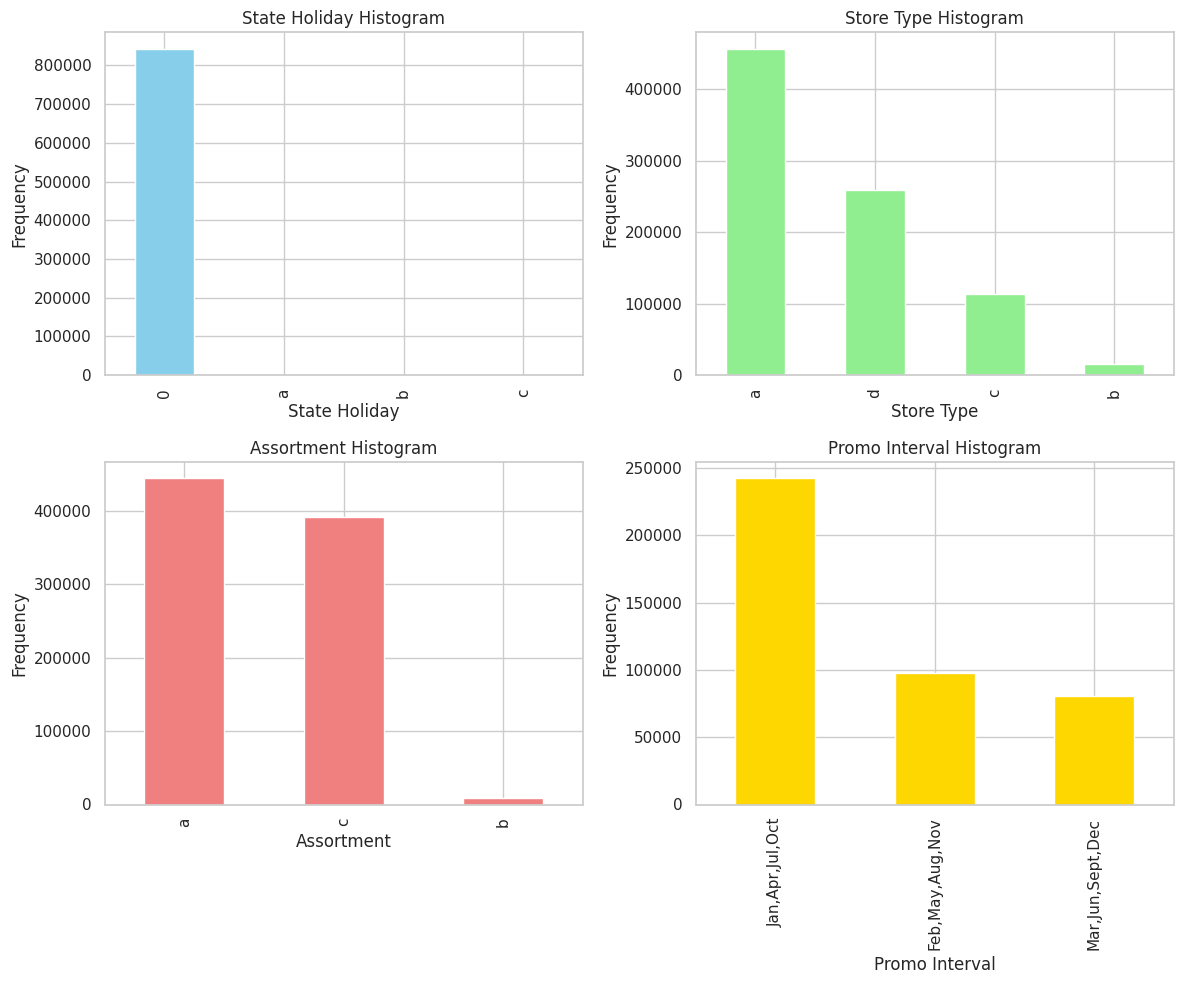

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt1 = df_m2['StateHoliday'].value_counts().plot(kind='bar', color='skyblue')
plt.title('State Holiday Histogram')
plt1.set(xlabel='State Holiday', ylabel='Frequency')

plt.subplot(2, 2, 2)
plt2 = df_m2['StoreType'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Store Type Histogram')
plt2.set(xlabel='Store Type', ylabel='Frequency')

plt.subplot(2, 2, 3)
plt3 = df_m2['Assortment'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Assortment Histogram')
plt3.set(xlabel='Assortment', ylabel='Frequency')

plt.subplot(2, 2, 4)
plt4 = df_m2['PromoInterval'].value_counts().plot(kind='bar', color='gold')
plt.title('Promo Interval Histogram')
plt4.set(xlabel='Promo Interval', ylabel='Frequency')

plt.tight_layout()
plt.show()

In [45]:
['Promo','Promo2','SchoolHoliday','StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']


Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

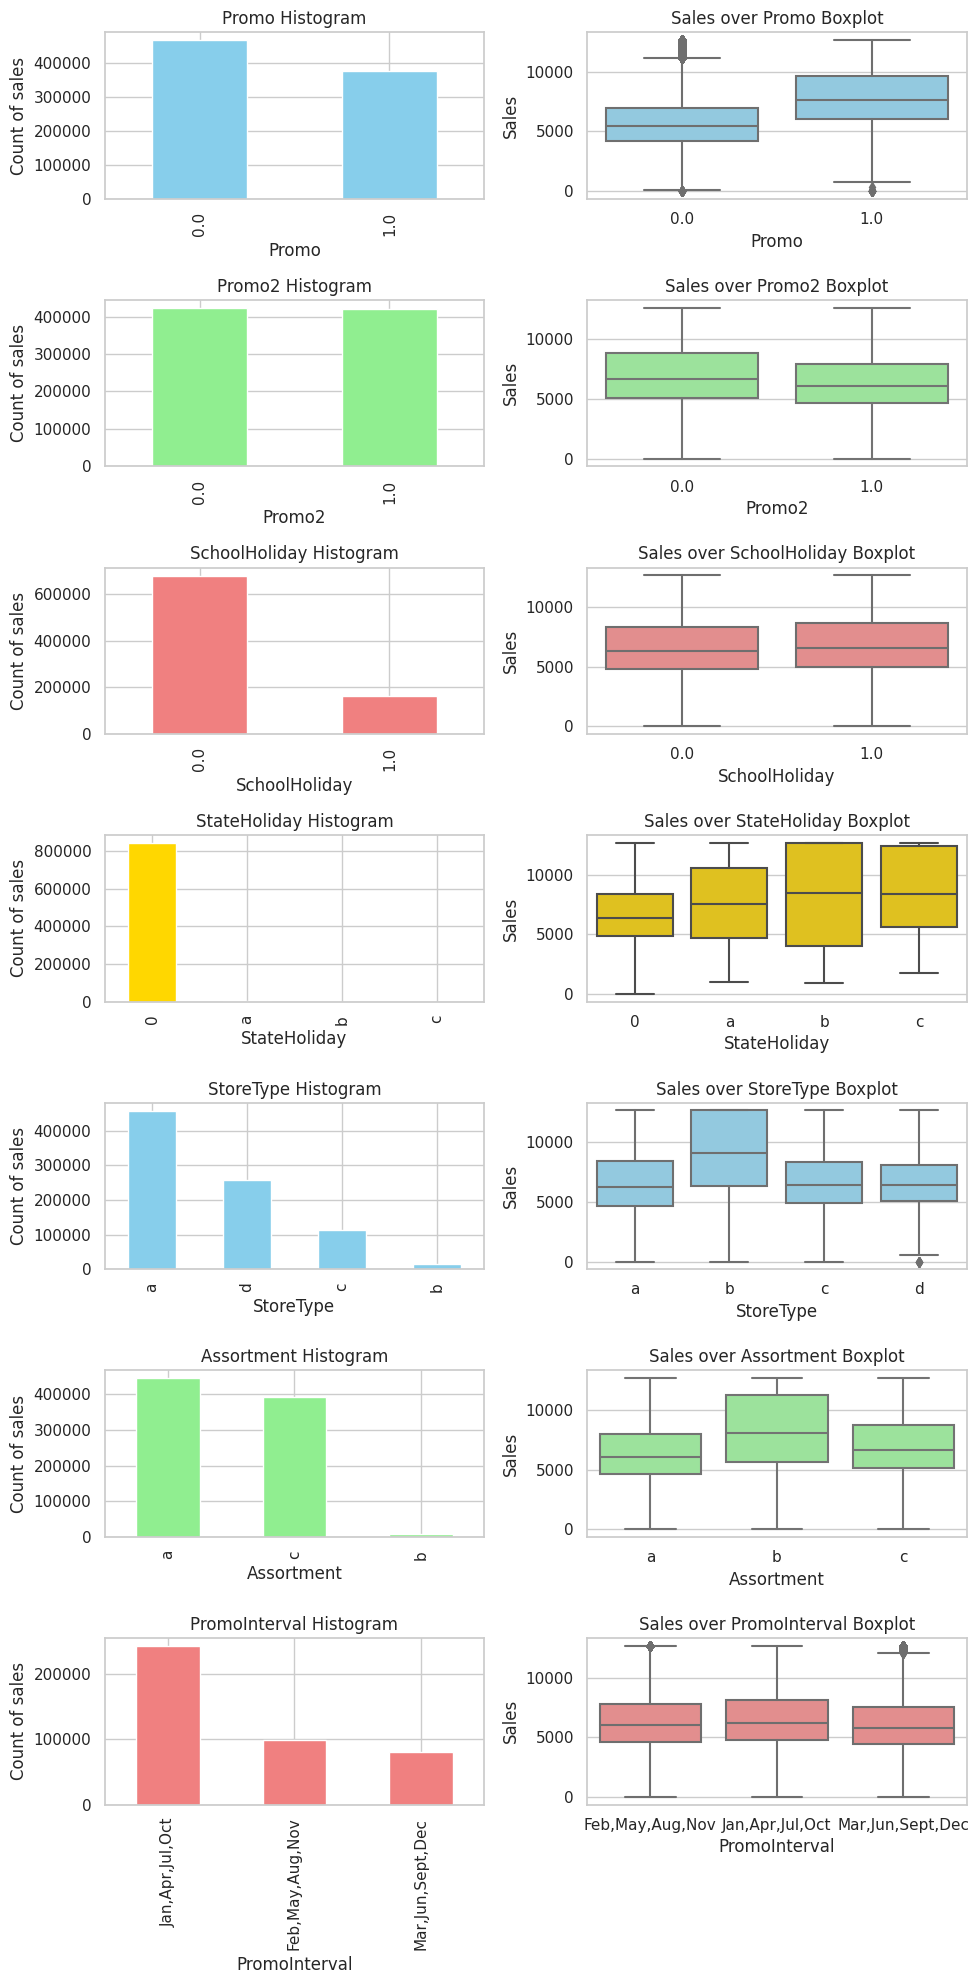

In [49]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 20))

input = cap_outliers(df_m2.copy())
columns = ['Promo','Promo2','SchoolHoliday','StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
colors = ['skyblue','lightgreen','lightcoral','gold']

color_cycle = itertools.cycle(colors)

for i, col in enumerate(columns):
    color_name = next(color_cycle)
    plt.subplot(7, 2, 2*i+1)
    plt1 = input[col].value_counts().plot(kind='bar', color=color_name)
    plt.title(f'{col} Histogram')
    plt1.set(xlabel=col, ylabel='Count of sales')

    plt.subplot(7, 2, 2*i+2)
    sns.boxplot(x=col, y='Sales', data=input, color=color_name)
    plt.title(f'Sales over {col} Boxplot')
    plt.xlabel(col)
    plt.ylabel('Sales')

plt.tight_layout()
plt.show()


In [ ]:
df_m2.StateHoliday.value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

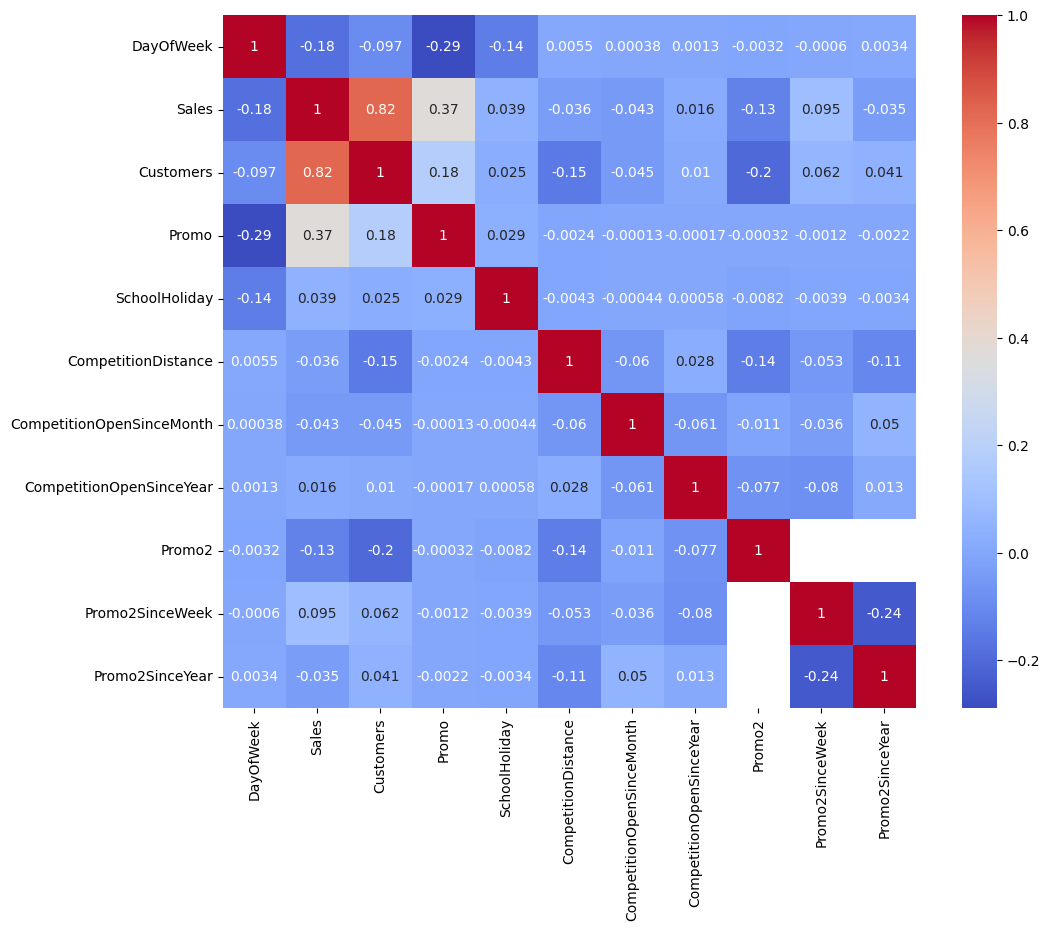

In [ ]:
# plot correlation matrix, specify image size
corr_matrix = df_m2.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',square=True)
plt.show()

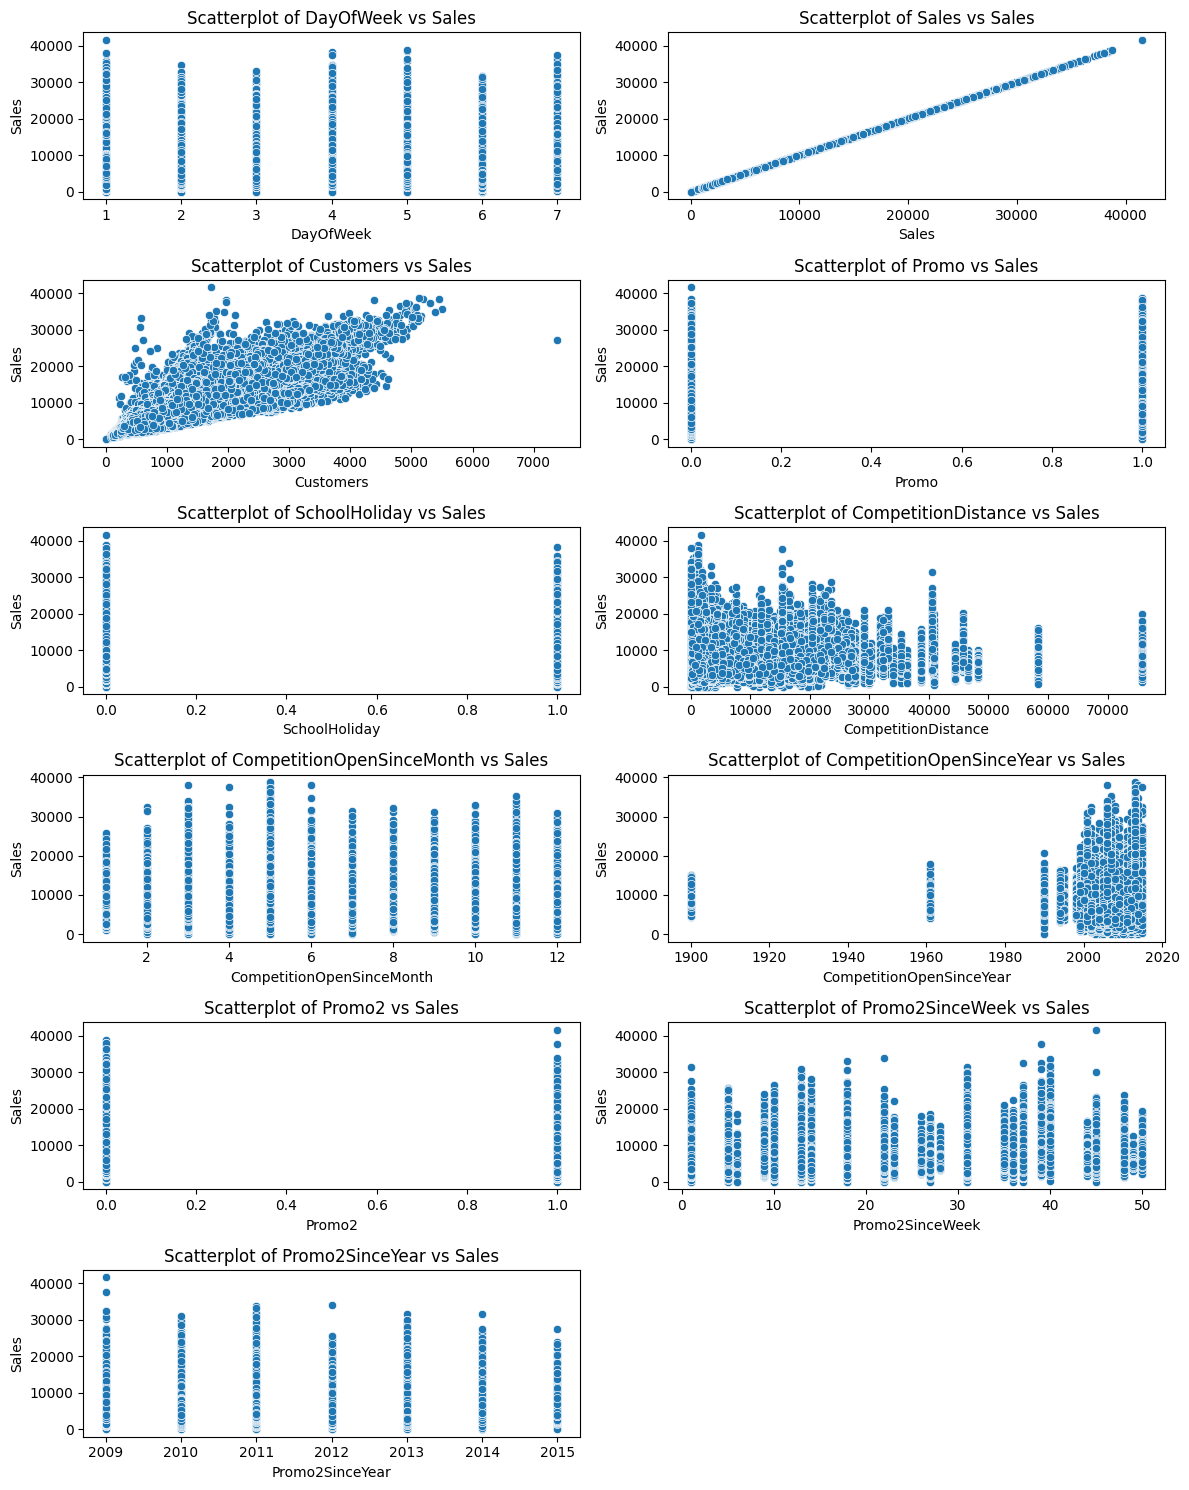

In [ ]:
# Chart - 3 visualizing Numerical Columns
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data stored in a DataFrame called 'df'
# 'Sales' is the dependent variable, and other numerical columns are independent variables

numerical_columns = df_m2.select_dtypes(include=['float64', 'int64']).columns    

# Calculate the number of rows and columns needed for the subplots
num_rows = (len(numerical_columns) // 2)+1
num_cols = 2

# Create subplots with 2 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))

# Flatten the axes array if necessary
axes = axes.flatten() if isinstance(axes, np.ndarray) else axes

# Iterate through each numerical column and create scatterplots in the subplots
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=column, y='Sales', data=df_m2, ax=axes[i])
    axes[i].set_title(f'Scatterplot of {column} vs Sales')

# Remove any empty subplots if the number of variables is odd
if len(numerical_columns) % 2 != 0:
    axes[-1].remove()

plt.tight_layout()
plt.show()

In [ ]:
df_c.columns
# drop sales column
df_m2.drop('Sales', axis=1, inplace=True)

Index(['level_0', 'index', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
from matplotlib.layout_engine import ConstrainedLayoutEngine
multiclass = ['DayOfWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']
binary = ['Promo','Promo2','SchoolHoliday']
dataframe = df_m2
target = 'Sales' # Continous

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 'Sales' is the dependent variable, and other numerical columns are independent variables

numerical_columns = (df_m2.select_dtypes(include=['float64', 'int64']).columns).tolist()   
numerical_columns.remove('Sales') 
# Calculate the number of rows and columns needed for the subplots
num_rows = (len(numerical_columns) // 2) + 1
num_cols = 2

# Create subplots with 2 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))

# Flatten the axes array if necessary
axes = axes.flatten() if isinstance(axes, np.ndarray) else axes

# Iterate through each numerical column and create boxplots in the subplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=column, y='Sales', data=df_c, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} vs Sales')

# Remove any empty subplots if the number of variables is odd
if len(numerical_columns) % 2 != 0:
    axes[-1].remove()

plt.tight_layout()
plt.show()


In [ ]:
print(df_m2.columns)
df_c = cap_outliers(df_m2)


Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
int(len(df_m2)*0.1)
df_m2
df_m2.duplicated().sum()

0

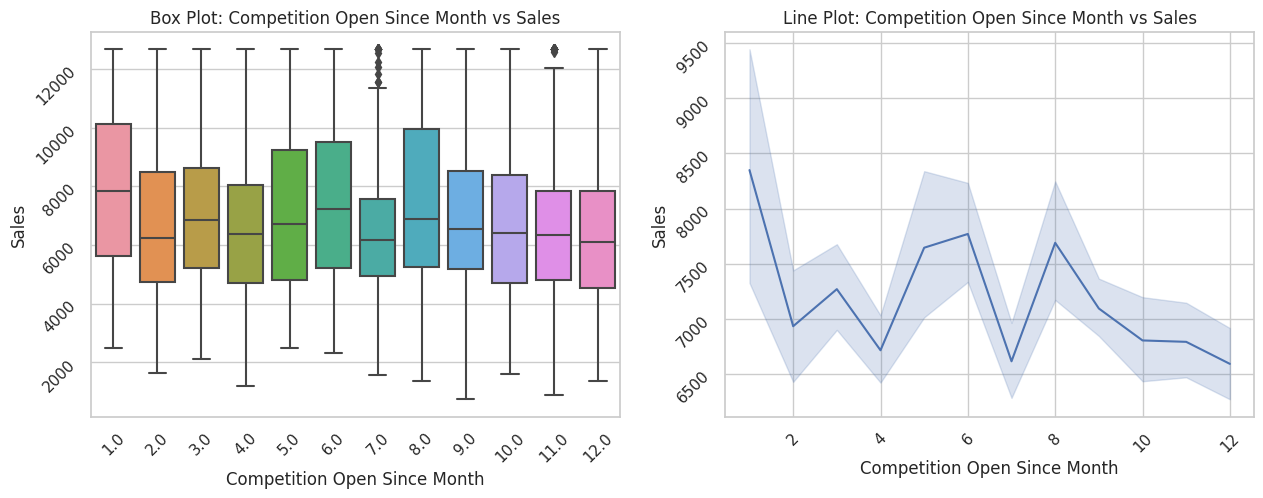

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.set(style='whitegrid')

sns.boxplot(x='CompetitionOpenSinceMonth', y='Sales', data=df_c.sample(n=int(len(df_c)*0.005), random_state=42), ax=axes[0])
axes[0].set_title('Box Plot: Competition Open Since Month vs Sales')
axes[0].set_xlabel('Competition Open Since Month')
axes[0].set_ylabel('Sales')
axes[0].tick_params(rotation=45)




sns.lineplot(x='CompetitionOpenSinceMonth', y='Sales', data=df_m2.sample(n=int(len(df_m2)*0.005), random_state=42), ax=axes[1])
axes[1].set_title('Line Plot: Competition Open Since Month vs Sales')
axes[1].set_xlabel('Competition Open Since Month')
axes[1].set_ylabel('Sales')
axes[1].tick_params(rotation=45)

plt.legend().remove()
#plt.tight_layout()
plt.show()


In [37]:
df_m2.describe()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,842206.000000,575773.000000,575773.000000,844392.000000,421085.000000,421085.000000
mean,3.520361,6955.514291,762.728395,0.446352,0.193580,5457.979627,7.224879,2008.697747,0.498684,23.253426,2011.754019
std,1.723689,3104.214680,401.227674,0.497114,0.395103,7809.437311,3.210144,5.978048,0.499999,14.100569,1.660962
min,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,2.000000,4859.000000,519.000000,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,3.000000,6369.000000,676.000000,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000
75%,5.000000,8360.000000,893.000000,1.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,7.000000,41551.000000,7388.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


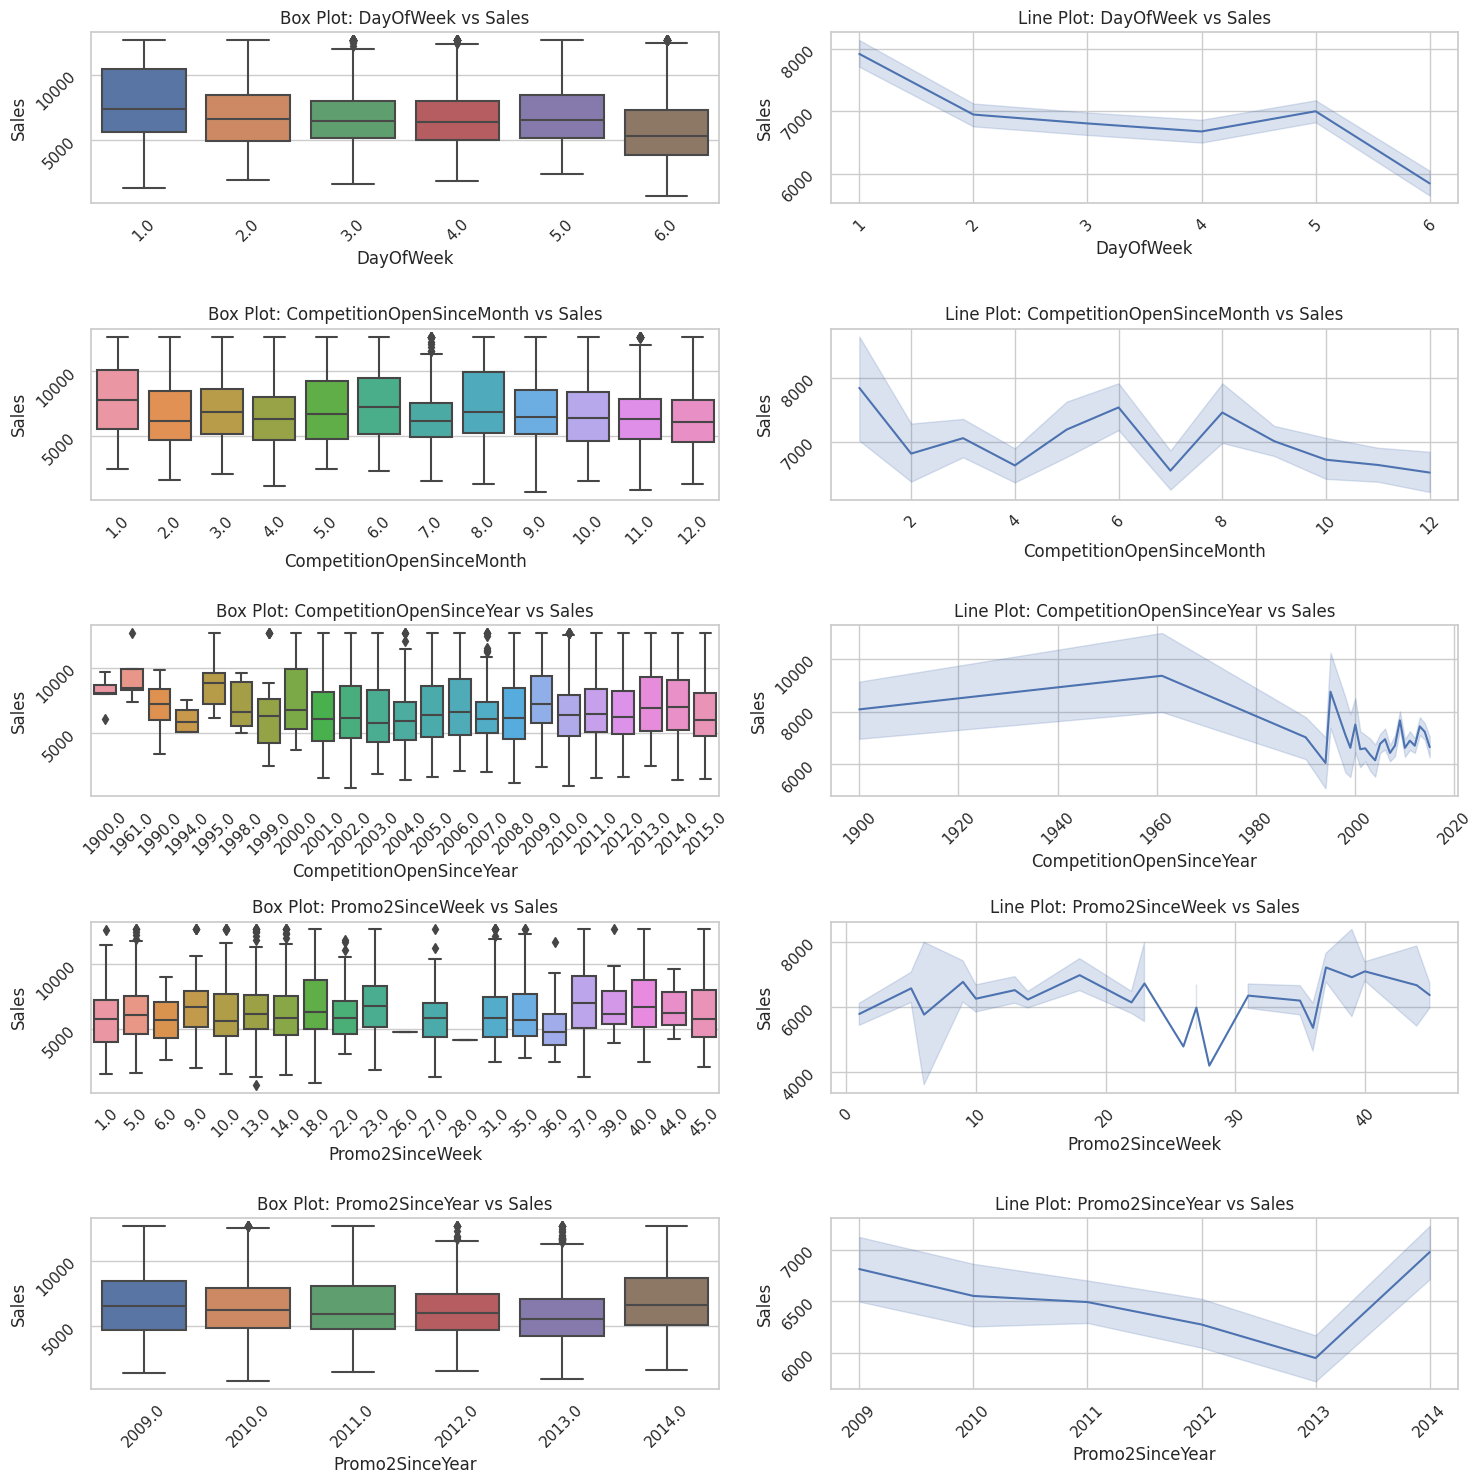

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

multiclass = ['DayOfWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
dataframe = cap_outliers(df_m2.reset_index(drop=True).copy())
target = 'Sales'

fig, axes = plt.subplots(len(multiclass), 2, figsize=(15, 15))

sns.set(style='whitegrid')

for i, feature in enumerate(multiclass):
    sns.boxplot(x=feature, y=target, data=dataframe.sample(n=int(len(dataframe)*0.005), random_state=42), ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot: {feature} vs {target}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel(target)
    axes[i, 0].tick_params(rotation=45)

    sns.lineplot(x=feature, y=target, data=dataframe.sample(n=int(len(dataframe)*0.005), random_state=42), ax=axes[i, 1])
    axes[i, 1].set_title(f'Line Plot: {feature} vs {target}')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel(target)
    axes[i, 1].tick_params(rotation=45)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
df_m2.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

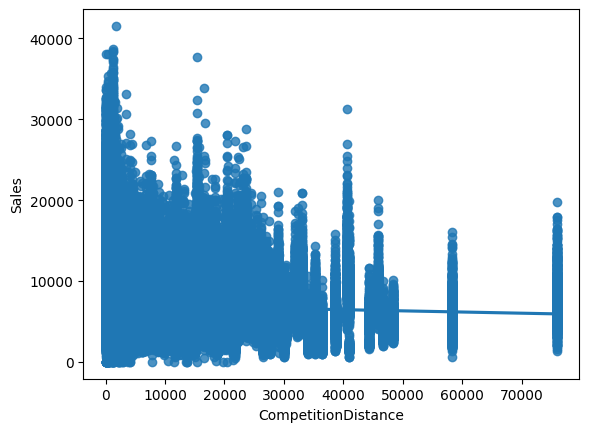

In [ ]:
sns.regplot(x='CompetitionDistance', y='Sales', data=df_m2)

In [ ]:
# Chart - 4 visualization code
# Creating a lineplot of total stay duration by week of reservation status
sns.lineplot(x=data['Compet'].dt.week,y='Total_stay_duration',data = data);
sns.boxplot(x=column, y='Sales', data=df_m2, ax=axes[i])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [ ]:
X_train, X_test, y_train, y_test = pre_processing(df_m)
X_train['label'] = y_train
X_test['label'] = y_test

In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label ='label', problem_type="regression",eval_metric="r2").fit(X_train, presets="best_quality", time_limit=60)

No path specified. Models will be saved in: "AutogluonModels/ag-20230608_103413/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20230608_103413/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    259460
Train Data Columns: 21
Label Column: label
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9236.63 MB
	Train Data (Original)  Memory Usage: 29.06 MB (0.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [ ]:
# With customers column
predictor.leaderboard(X_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.610029,0.607242,2.344490,13.735510,58.187510,0.004173,0.009010,3.967432,2,True,4
1,KNeighborsDist_BAG_L1,0.546024,0.549650,1.721372,12.838897,2.562728,1.721372,12.838897,2.562728,1,True,2
2,KNeighborsUnif_BAG_L1,0.530934,0.533765,1.737675,7.866672,2.488211,1.737675,7.866672,2.488211,1,True,1
3,LightGBMXT_BAG_L1,0.488190,0.450242,0.618945,0.887602,51.657350,0.618945,0.887602,51.657350,1,True,3


model	score_test	score_val	pred_time_test	pred_time_val	fit_time	pred_time_test_marginal	pred_time_val_marginal	fit_time_marginal	stack_level	can_infer	fit_order
0	WeightedEnsemble_L2	

0.626180	0.624149	2.790824	9.337196	48.863949	0.004332	0.007426	2.882913	2	True	4

model	score_test	score_val	pred_time_test	pred_time_val	fit_time	pred_time_test_marginal	pred_time_val_marginal	fit_time_marginal	stack_level	can_infer	fit_order
0	WeightedEnsemble_L2	0.610029	0.607242	2.344490	13.735510	58.187510	0.004173	0.009010	3.967432	2	True	4

In [ ]:
predictor.leaderboard(X_test, silent=True)

In [ ]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
